In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from sklearn.metrics import classification_report, confusion_matrix

# Load the combined datasets
X_train_combined = np.load('../data/processed/combined/X_train_combined.npy')
y_train_combined = np.load('../data/processed/combined/y_train_combined.npy')
X_val_combined = np.load('../data/processed/combined/X_val_combined.npy')
y_val_combined = np.load('../data/processed/combined/y_val_combined.npy')
X_test_combined = np.load('../data/processed/combined/X_test_combined.npy')
y_test_combined = np.load('../data/processed/combined/y_test_combined.npy')

# Check the shapes of the loaded data
print(f"Training data shape: {X_train_combined.shape}, Labels shape: {y_train_combined.shape}")
print(f"Validation data shape: {X_val_combined.shape}, Labels shape: {y_val_combined.shape}")
print(f"Test data shape: {X_test_combined.shape}, Labels shape: {y_test_combined.shape}")


Training data shape: (97700, 32, 128, 1), Labels shape: (97700,)
Validation data shape: (24426, 32, 128, 1), Labels shape: (24426,)
Test data shape: (19382, 32, 128, 1), Labels shape: (19382,)


In [11]:
# Find the unique classes in the training set
unique_train_labels = np.unique(y_train_combined)

# Filter validation and test sets to only include labels that exist in the training set
valid_indices_val = np.isin(y_val_combined, unique_train_labels)
valid_indices_test = np.isin(y_test_combined, unique_train_labels)

# Apply the filtering
X_val_combined = X_val_combined[valid_indices_val]
y_val_combined = y_val_combined[valid_indices_val]

X_test_combined = X_test_combined[valid_indices_test]
y_test_combined = y_test_combined[valid_indices_test]

# Check new sizes of the validation and test sets after filtering
print(f"Filtered validation set size: {X_val_combined.shape}")
print(f"Filtered test set size: {X_test_combined.shape}")


Filtered validation set size: (86, 32, 128, 1)
Filtered test set size: (2, 32, 128, 1)


In [12]:
from sklearn.preprocessing import LabelEncoder

# Combine all labels from train, filtered validation, and filtered test sets
all_labels = np.concatenate([y_train_combined, y_val_combined, y_test_combined])

# Fit the LabelEncoder on all labels
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

# Transform the labels for each set
y_train_combined = label_encoder.transform(y_train_combined)
y_val_combined = label_encoder.transform(y_val_combined)
y_test_combined = label_encoder.transform(y_test_combined)

# Verify the number of classes after encoding
num_classes = len(label_encoder.classes_)
print(f"Number of unique classes after encoding: {num_classes}")


Number of unique classes after encoding: 30990


In [13]:
# Update the output layer to match the number of classes
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 128, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # Use the correct number of classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/Users/abdulrahmandawoud/Library/Caches/pypoetry/virtualenvs/cyrillicsegnet-3DupRicP-py3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Training parameters
batch_size = 32
epochs = 20

# Train the model
history = model.fit(
    X_train_combined, y_train_combined,
    validation_data=(X_val_combined, y_val_combined),
    batch_size=batch_size,
    epochs=epochs
)


Epoch 1/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 107s 35ms/step - accuracy: 0.0142 - loss: 7.6386 - val_accuracy: 0.0000e+00 - val_loss: 11.1268
Epoch 2/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 106s 35ms/step - accuracy: 0.0214 - loss: 7.2625 - val_accuracy: 0.0000e+00 - val_loss: 11.1904
Epoch 3/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 106s 35ms/step - accuracy: 0.0419 - loss: 7.0335 - val_accuracy: 0.0000e+00 - val_loss: 12.0015
Epoch 4/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 111s 36ms/step - accuracy: 0.0691 - loss: 6.7786 - val_accuracy: 0.0000e+00 - val_loss: 13.1524
Epoch 5/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 108s 35ms/step - accuracy: 0.0975 - loss: 6.4991 - val_accuracy: 0.0000e+00 - val_loss: 13.8094
Epoch 6/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 109s 36ms/step - accuracy: 0.1196 - loss: 6.2211 - val_accuracy: 0.0000e+00 - val_loss: 14.4664
Epoch 7/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 106s 35ms/step - accuracy: 0.1354 - loss: 5.9683 - val_accuracy: 0.0000e+00 - val_loss: 16.8526
Epoch 8/20
3054/3054 ━━━━━━━━━━━━━

In [15]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_combined, y_test_combined)
print(f"Test Accuracy: {test_acc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0000e+00 - loss: 17.3797
Test Accuracy: 0.0000


In [16]:
# Generate predictions for the test set
y_pred = np.argmax(model.predict(X_test_combined), axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


/Users/abdulrahmandawoud/Library/Caches/pypoetry/virtualenvs/cyrillicsegnet-3DupRicP-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abdulrahmandawoud/Library/Caches/pypoetry/virtualenvs/cyrillicsegnet-3DupRicP-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abdulrahmandawoud/Library/Caches/pypoetry/virtualenvs/cyrillicsegnet-3DupRicP-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined a

Classification Report:
               precision    recall  f1-score   support

       25302       0.00      0.00      0.00       0.0
       26219       0.00      0.00      0.00       1.0
       29549       0.00      0.00      0.00       1.0
       29791       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



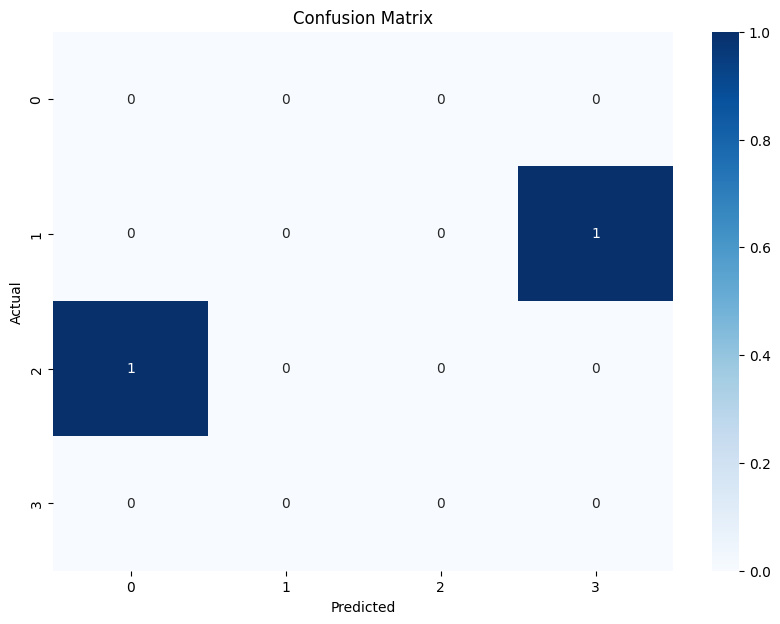

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Print the classification report
print("Classification Report:\n", classification_report(y_test_combined, y_pred))

# Generate and plot confusion matrix
conf_matrix = confusion_matrix(y_test_combined, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


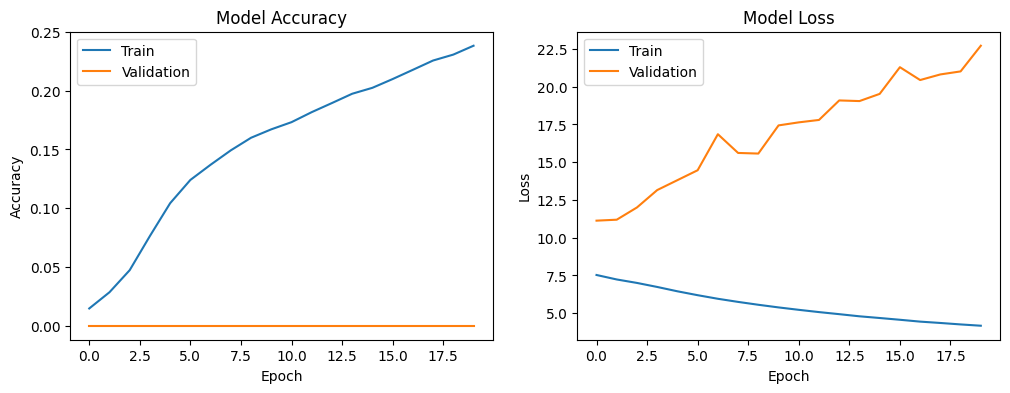

In [18]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [19]:
# Save the trained model
model.save('../models/combined_cnn_model.h5')

# Optionally, save the label encoder as well for decoding predictions
import pickle
with open('../models/label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
